In [ ]:
## some of this is review; some is quite new

In [1]:
import numpy as np
from astropy.io import fits
from matplotlib import pyplot as plt

In [3]:
##next I am using a fits file that manga suggests 

In [4]:
# This assumes the MAPS file is in the current directory.  If that's not
# true, replace '' below with the directory containing the data file.
dir = ''
hdu = fits.open(dir+'manga-7443-12703-MAPS-HYB10-MILESHC-MASTARSSP.fits.gz')

In [6]:
#hdu

In [7]:
hdu.info()

Filename: manga-7443-12703-MAPS-HYB10-MILESHC-MASTARSSP.fits.gz
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     147   ()      
  1  SPX_SKYCOO    1 ImageHDU        44   (74, 74, 2)   float32   
  2  SPX_ELLCOO    1 ImageHDU        49   (74, 74, 4)   float32   
  3  SPX_MFLUX     1 ImageHDU        37   (74, 74)   float32   
  4  SPX_MFLUX_IVAR    1 ImageHDU        38   (74, 74)   float32   
  5  SPX_SNR       1 ImageHDU        35   (74, 74)   float32   
  6  BINID         1 ImageHDU        46   (74, 74, 5)   int32   
  7  BIN_LWSKYCOO    1 ImageHDU        44   (74, 74, 2)   float32   
  8  BIN_LWELLCOO    1 ImageHDU        49   (74, 74, 4)   float32   
  9  BIN_AREA      1 ImageHDU        36   (74, 74)   float32   
 10  BIN_FAREA     1 ImageHDU        35   (74, 74)   float32   
 11  BIN_MFLUX     1 ImageHDU        38   (74, 74)   float32   
 12  BIN_MFLUX_IVAR    1 ImageHDU        39   (74, 74)   float32   
 13  BIN_MFLUX_MASK    1 Image

In [8]:
hdu['EMLINE_GFLUX'].data.shape #Halpha emission line / galactic flux
#given as (velocity?) "channel", y-position, x-position.

(35, 74, 74)

In [9]:
hdu['EMLINE_GFLUX'].header #gives details for the extension of Halpha flux

XTENSION= 'IMAGE   '           / Image extension                                
BITPIX  =                  -32 / array data type                                
NAXIS   =                    3 / number of array dimensions                     
NAXIS1  =                   74                                                  
NAXIS2  =                   74                                                  
NAXIS3  =                   35                                                  
PCOUNT  =                    0 / number of parameters                           
GCOUNT  =                    1 / number of groups                               
WCSAXES =                    3 / Number of coordinate axes                      
CRPIX1  =                 38.0 / Pixel coordinate of reference point            
CRPIX2  =                 38.0 / Pixel coordinate of reference point            
CRPIX3  =                  1.0 / Pixel coordinate of reference point            
PC1_1   =         -0.0001388

In [10]:
flux_halpha = hdu['EMLINE_GFLUX'].data[23]
#defines this as a pipeline of sorts?

In [11]:
emline = {}
for k, v in hdu['EMLINE_GFLUX'].header.items():
    if k[0] == 'C':
        try:
            i = int(k[1:])-1
        except ValueError:
            continue
        emline[v] = i

In [12]:
flux_halpha = hdu['EMLINE_GFLUX'].data[emline['Ha-6564']]

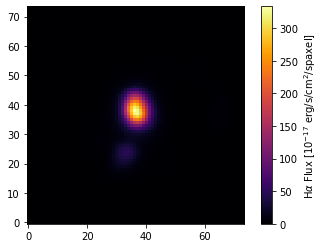

In [13]:
plt.clf() #need to look into this extension... acronym clf?
plt.imshow(hdu['EMLINE_GFLUX'].data[emline['Ha-6564']], origin='lower', interpolation='nearest',
           cmap='inferno')
plt.colorbar(label=r'H$\alpha$ Flux [$10^{-17}$ erg/s/cm$^2$/spaxel]')
plt.show()

In [14]:
mask_extension = hdu['EMLINE_GFLUX'].header['QUALDATA']